In [ ]:
pip install dtaidistance

In [ ]:
import pandas as pd
import numpy as np
from dtaidistance import dtw
import matplotlib.pyplot as plt
import yfinance as yf

# Define tickers
ticker = [
    'TECHM.NS', 'M&M.NS', 'WIPRO.NS', 'SBIN.NS', 'BAJFINANCE.NS',
    'INFY.NS', 'KOTAKBANK.NS', 'TRENT.NS', 'BAJAJFINSV.NS', 'SHRIRAMFIN.NS',
    'ADANIPORTS.NS', 'TATAMOTORS.NS', 'AXISBANK.NS', 'COALINDIA.NS', 'HCLTECH.NS',
    'BRITANNIA.NS', 'ICICIBANK.NS', 'LT.NS', 'CIPLA.NS', 'NTPC.NS',
    'BHARTIARTL.NS', 'NESTLEIND.NS', 'TATACONSUM.NS', 'HEROMOTOCO.NS', 'APOLLOHOSP.NS',
    'BEL.NS', 'HDFCBANK.NS', 'HINDALCO.NS', 'TCS.NS', 'SBILIFE.NS',
    'POWERGRID.NS', 'ULTRACEMCO.NS', 'ADANIENT.NS', 'HDFCLIFE.NS', 'GRASIM.NS',
    'ITC.NS', 'DRREDDY.NS', 'RELIANCE.NS', 'ONGC.NS', 'JSWSTEEL.NS',
    'EICHERMOT.NS', 'TITAN.NS', 'SUNPHARMA.NS', 'INDUSINDBK.NS', 'BPCL.NS',
    'MARUTI.NS', 'TATASTEEL.NS', 'BAJAJ-AUTO.NS', 'ASIANPAINT.NS', 'HINDUNILVR.NS'
]

# Initialize DTW distance lists
dtw_arima = []
dtw_lstm = []
dtw_random = []



In [ ]:
start = '2023-01-01'
end = '2023-12-31'

For TECHM.NS, Distance for LSTM is 1.175652013605847, ARIMA is 1.7273085121487617, and Random Model is 1.1252923274108173
Process for TECHM.NS is completed
For M&M.NS, Distance for LSTM is 1.8121601890866212, ARIMA is 5.658448435954598, and Random Model is 2.255180004442922
Process for M&M.NS is completed
For WIPRO.NS, Distance for LSTM is 0.9764376862227094, ARIMA is 3.078354661061755, and Random Model is 1.015740432531634
Process for WIPRO.NS is completed
For SBIN.NS, Distance for LSTM is 1.116764787580251, ARIMA is 4.1763277200954425, and Random Model is 2.159024158595696
Process for SBIN.NS is completed
For BAJFINANCE.NS, Distance for LSTM is 1.7623941295545462, ARIMA is 3.0138188660581124, and Random Model is 1.0039308566763248
Process for BAJFINANCE.NS is completed
For INFY.NS, Distance for LSTM is 1.855697032241617, ARIMA is 0.9596199551007701, and Random Model is 1.918383086031404
Process for INFY.NS is completed
For KOTAKBANK.NS, Distance for LSTM is 1.6060631917432788, ARIMA 

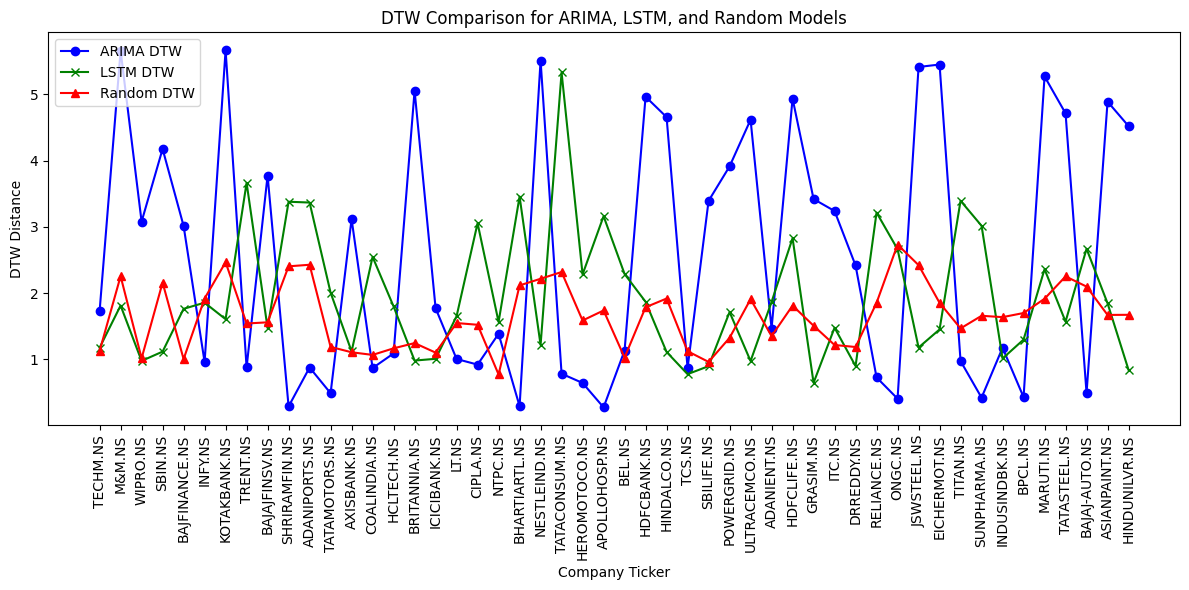

In [ ]:
# Loop through each ticker to compute DTW distances
for company in ticker:
    # Load data
    data = pd.read_csv(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/{company}.csv')

    # Extract actual and forecasted values
    actual = data['Actual Price'].to_list()
    lstm = data['LSTM Forecast'].to_list()
    arima = data['ARIMA Forecast'].to_list()

    # Determine the initial price and set the range for the random model
    initial_price = 0
    lower_bound = -0.5  # 10% decrease from initial value
    upper_bound = 0.5

     # Generate random forecast with values in the 10% range of the initial price
    random_forecast = np.random.uniform(lower_bound, upper_bound, len(actual)).tolist()

    # Compute DTW distances
    distancelstm = dtw.distance(actual, lstm)
    distancearima = dtw.distance(actual, arima)
    distancerandom = dtw.distance(actual, random_forecast)

    # Append distances to lists
    dtw_lstm.append(distancelstm)
    dtw_arima.append(distancearima)
    dtw_random.append(distancerandom)

    # Print progress
    print(f'For {company}, Distance for LSTM is {distancelstm}, ARIMA is {distancearima}, and Random Model is {distancerandom}')
    print(f'Process for {company} is completed')

# Create a DataFrame to store DTW values
dtw_data = {
    'Ticker': ticker,
    'DTW_LSTM': dtw_lstm,
    'DTW_ARIMA': dtw_arima,
    'DTW_Random': dtw_random
}

dtw_data = pd.DataFrame(dtw_data)

# Plot the DTW comparisons
plt.figure(figsize=(12, 6))
plt.plot(ticker, dtw_arima, label='ARIMA DTW', marker='o', color='blue')
plt.plot(ticker, dtw_lstm, label='LSTM DTW', marker='x', color='green')
plt.plot(ticker, dtw_random, label='Random DTW', marker='^', color='red')
plt.xlabel('Company Ticker')
plt.ylabel('DTW Distance')
plt.title('DTW Comparison for ARIMA, LSTM, and Random Models')
plt.xticks(rotation=90)  # Rotate ticker labels for better readability
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig(f'/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/DTW_Comparison_random.png', format='png', dpi=300)

# Save DTW data to CSV
dtw_data.to_csv('/content/drive/MyDrive/Ph.D/Datasets/lstm_arima_compare/RMSE/dtw_values_with_random.csv', index=False)

print("DTW comparison completed and results saved.")


In [ ]:
random_forecast

[-0.10836154930335817,
 0.42571967017179724,
 0.04877585863544209,
 -0.17928308864992504,
 0.08894364257731424,
 0.44570919826083644,
 -0.03977998762851165,
 0.11247671811507853,
 -0.14974068398286566,
 0.46279245225870436,
 -0.35993861392939885,
 0.4875117244577083,
 -0.16463123751331754,
 0.22852703780682138,
 -0.4514889500172258,
 -0.03336060184866041,
 -0.2530290741641361,
 0.3469585720595928,
 -0.3128462543735514,
 -0.27505801358382775]